In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt 

# L_0 is intital labour, n is labour growth rate, A_0 is initial labour effectivness, g is labour effectiveness growth rate, s is savings ratio and delta is deprecition rate

In [19]:
alpha= 0.2
L_0=10
A_0=1
n=0.1
g=0.1
s=0.2
delta=0.01

In [20]:
def y(k):
    return pow(k,alpha)
def breakeveninvestment(k):
    return (n+g+delta)*k

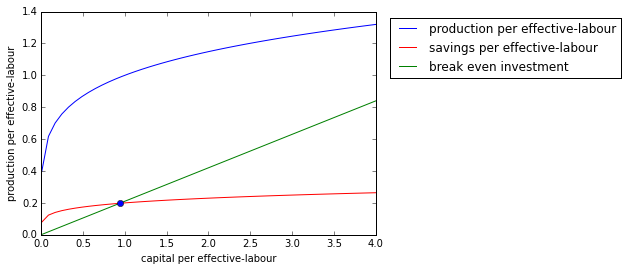

In [21]:
k=np.linspace(0.01,4,51)
plt.plot(k,y(k),'b-')
plt.plot(k,s*y(k),'r-')
plt.plot(k,breakeveninvestment(k),'g-')

k_equilibrium= pow(s/(n+g+delta),1/(1-alpha))
plt.plot(k_equilibrium,s*y(k_equilibrium),'bo')

plt.legend(['production per effective-labour','savings per effective-labour','break even investment'],bbox_to_anchor=(1.75,1))
plt.xlabel('capital per effective-labour')
plt.ylabel('production per effective-labour')

# Above graph shows that when savings equal investment, the capital per effective worker is in equilibrium

In [5]:
L=[L_0]
A=[A_0]
Y=[]
time_list=[]

time_interval=0.1
time=10
no_of_iterations=int(time/time_interval)

for iter in range(no_of_iterations):
    Y.append(pow(k_equilibrium,alpha)*A[iter]*L[iter])
    L.append(L[iter]+L[iter]*n*time_interval)
    A.append(A[iter]+A[iter]*g*time_interval)
    time_list.append(iter*time_interval)
    


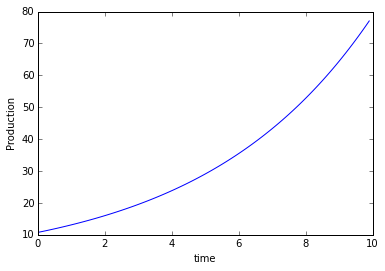

In [6]:
plt.plot(time_list,Y)
plt.xlabel('time')
plt.ylabel('Production')

# Since the effective labour grows at n+g rate so the production also grows exponentially. The above graph shows how production increases exponentially to keep production per effective capita constant.

# Now I change the effective labour growth rate ,n,g and also the saving ratio,s . This will create a new equilibrium point for capital per effective worker. So I have created a transient response by integrating the differential equation for capital accumulation.

In [10]:
n_new=0.1
g_new=0.1
s_new=0.4

In [11]:
k=[k_equilibrium,k_equilibrium]
L=[L_0]
A=[A_0]
time_list=[0,1]
production_per_capita=[y(k_equilibrium),y(k_equilibrium)]
time_interval=0.1
time=10
no_of_iterations=int(time/time_interval)
for iter in range(no_of_iterations):
    L.append(L[iter]+L[iter]*n_new*time_interval)
    A.append(A[iter]+A[iter]*g_new*time_interval)
    k.append(k[iter+1]+(s_new*production_per_capita[iter+1]-(n_new+g_new+delta)*k[iter+1])*time_interval )
    production_per_capita.append(y(k[iter+1]))
    time_list.append(iter*time_interval+1)

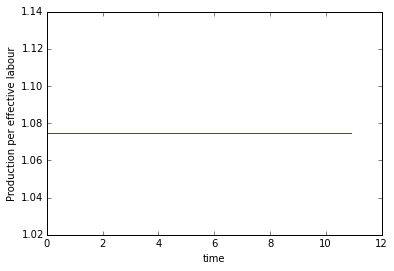

In [12]:
k_new_equilibrium= pow(s_new/(n_new+g_new+delta),1/(1-alpha))
plt.plot(time_list,production_per_capita)
plt.plot([0,time_list[-1]],[y(k_new_equilibrium),y(k_new_equilibrium)],'r-')
plt.xlabel('time')
plt.ylabel('Production per effective labour')

# The graph above shows how production starts moving from old equilibrium to new equilibrium after time t=1 and finally achieves new equilibrium indicated by red line.